In [5]:
!pip install numpy
!pip install pandas

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv("Reviews.csv")
df.head()
df=df.dropna()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


              precision    recall  f1-score   support

          -1       0.69      0.57      0.62     16452
           0       0.48      0.20      0.29      8460
           1       0.88      0.96      0.92     88769

    accuracy                           0.84    113681
   macro avg       0.68      0.58      0.61    113681
weighted avg       0.82      0.84      0.83    113681



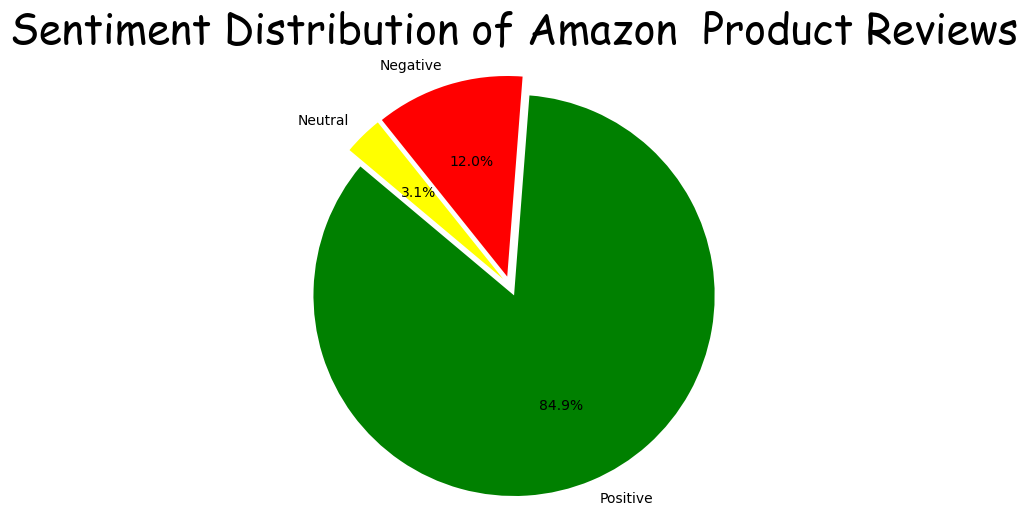

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from collections import Counter

x=df["Summary"]
y = df['Score'].apply(lambda x: -1 if x <= 2 else (0 if x == 3 else 1))
vectorizer=CountVectorizer(stop_words='english',max_features=10000)
X_vectorized=vectorizer.fit_transform(x)
X_train,X_test,Y_train,Y_test=train_test_split(X_vectorized,y,test_size=0.2,random_state=42)
model=MultinomialNB()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(classification_report(Y_test,y_pred))
sentiments=['Negative' if pred==-1 else 'Neutral' if pred==0 else 'Positive' for pred in y_pred]
sentiments_counts=Counter(sentiments)
labels=sentiments_counts.keys()
sizes=sentiments_counts.values()
colors=["green","red","yellow"]
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',startangle=140, explode=(0.05, 0.05, 0.05))
plt.axis('equal') 
plt.title('Sentiment Distribution of Amazon  Product Reviews',fontdict={'fontsize':30,'fontname':'Comic Sans MS'} )
plt.show()